# Clasificacion Basica: Predecir una imagen de moda

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

## Importar el set de datos de moda de MNIST

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()



<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Obtener información del dataset

Como primer paso al enfrentarnos a un dataset, debemos analizar su contenido. Para ello lo primero será ver las dimensiones que tiene cada uno de los elementos cargados para train y para test.

In [0]:
train_images.shape

In [0]:
len(train_labels)

In [0]:
train_labels

In [0]:
test_images.shape

In [0]:
len(test_labels)

## Analisis de las imágenes

Ahora que conocemos las dimensiones del dataset, podemos sacar la dimensiones de las imágenes. No obstante, al tratarse de un dataset de imágenes vamos a tratar de visualizarlas antes de entrar a los procesos de normalización de los datos.

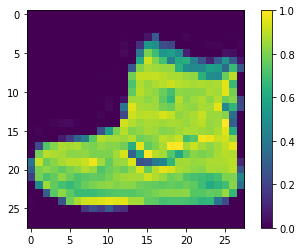

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

**NORMALIZAMOS**

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

**Visualización de todos los tipos de imágenes despues de normalizar**

Una vez hemos normalizado las imágenes vamos a comprobar cuanta información se ha perdido en el proceso. Para ello vamos a visualizar una imagen por cada tipo de elemento de ropa diferente. 

**Nota:** Recuerda que al haber analizado previamente el dataset podemos saber  el total de "etiquetas" diferentes, es decir, los tipos de ropas que tenemos.

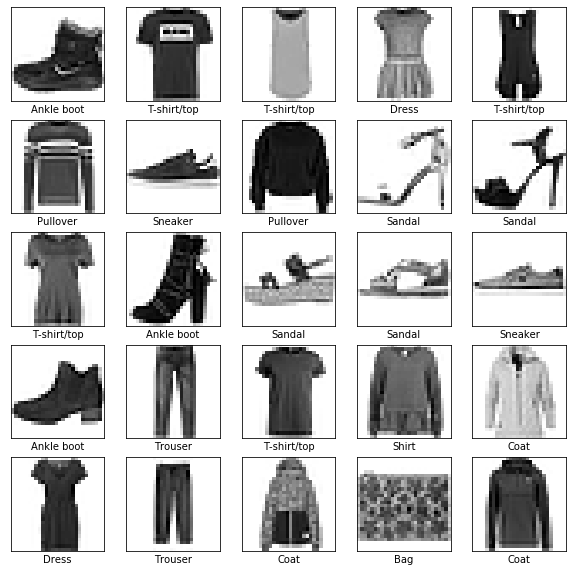

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Construir el Modelo


In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Entrenamiento

In [0]:
model.fit(train_images, train_labels, epochs=10)

## Calculo del error

In [0]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

## Predicciones

In [0]:
predictions = model.predict(test_images)
predictions[0]

In [0]:
np.argmax(predictions[0])

In [0]:
test_labels[0]

**Funciones para dibujar**

In [0]:
# TODO para esquematizar mejor el código vamos a realizar dos funciones.
# La primera se encarga de dibujar la imagen con información del entrenamiento
# La segunda se encargará de dibujar el gráfico de barras
# Consejo deberiamos de pasar como parametro el array de predicciones, las imagenes y el label
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

**Dibujamos la predicción realizada**

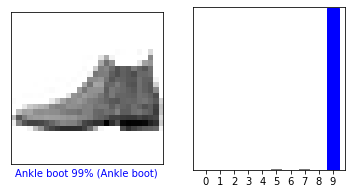

In [0]:
# TODO vamos a reproducir la imagen de arriva, para ello tenemos que analizar bien tres variables
# predictions, test_labels y test_images
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [0]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Ahora que hemos visualizado las predicciones que se ha realizado sobre dos objetos de manera individual, queremos visualizar en una sola imagen todos los objetos con el histograma de su clasificacion.

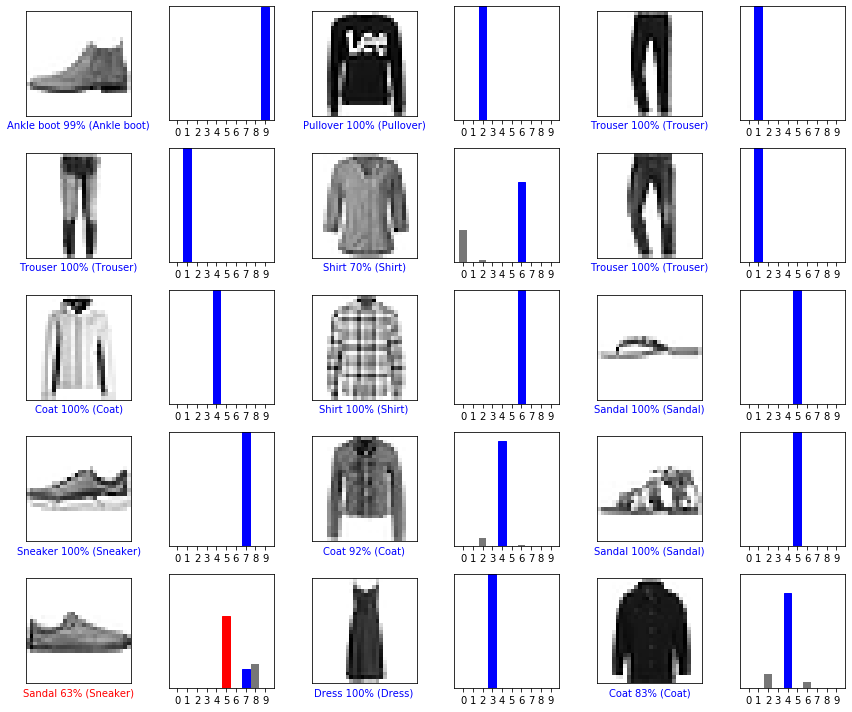

In [0]:
# TODO plotear primero las imagenes de X test, sus labels de la predicción y despues las etiquetas (valores de true labels).
# Nota: aseguraros de dar diferentes colores si la predicción es correcta o incorrecta.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Finalmente, usamos el modelo entrenado para hacer una prediccion sobre una unica imagen.

In [0]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

Los modelos de `tf.keras` son optimizados sobre *batch* o bloques, 
o coleciones de ejemplos por vez.
De acuerdo a esto, aunque use una unica imagen toca agregarla a una lista:

In [0]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

Ahora prediga la etiqueta correcta para esta imagen:

In [0]:
predictions_single = model.predict(img)

print(predictions_single)

In [0]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)